In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV en un DataFrame
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Mostrar las primeras 5 filas del DataFrame
print(df.head())

# Mostrar información general sobre el DataFrame, incluyendo los tipos de datos de las columnas
print(df.info())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [17]:
# 1. Limpieza de datos con Python

# -Identificar y solucionar cualquier valor duplicado.
print(f'Número de filas duplicadas: {df.duplicated().sum()}')

# -Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
# Convertir la columna 'TotalCharges' a numérica
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# -Identificar y solucionar cualquier inconsistencia en los valores categóricos.
# Reemplazar "no internet service" con "no" en las columnas relevantes
columnas_reemplazar = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in columnas_reemplazar:
    df[col] = df[col].replace('No internet service', 'No')

# Estandarizar los valores de las columnas categóricas (convertir a minúsculas)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower()

# -Identificar y solucionar cualquier valor faltante en el dataset.
# Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
print(df.isnull().sum())  # `TotalCharges` tiene 11 valores faltantes
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())  # Rellenar con la mediana


# -Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).
# Resumen estadístico del DataFrame
print(df.describe())
# Interpretación: En este conjunto de datos no hay puntos de datos inapropiados o inusuales evidentes.

Número de filas duplicadas: 0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55

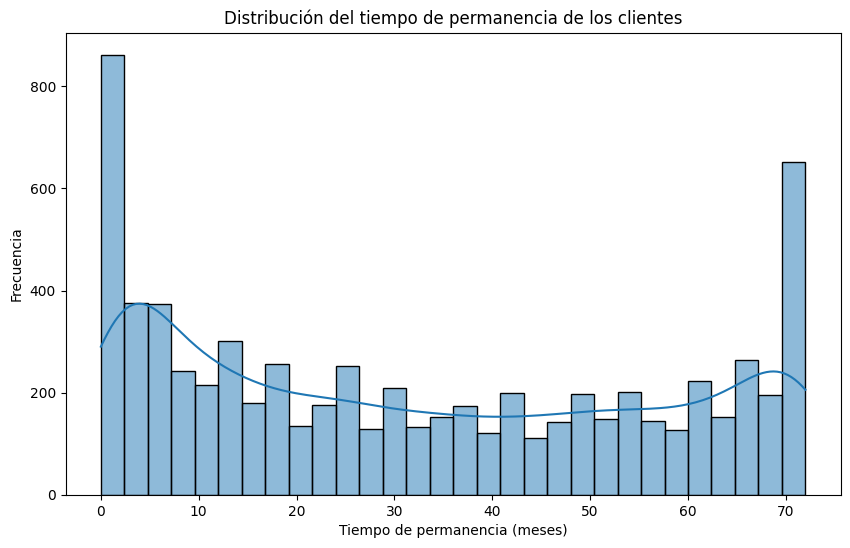

In [18]:
# 2. Exploración de datos con Python

# 2.1 Crear dos tipos diferentes de visualizaciones exploratorias univariadas.

# Histograma de la columna `tiempo de permanencia`
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribución del tiempo de permanencia de los clientes')
plt.xlabel('Tiempo de permanencia (meses)')
plt.ylabel('Frecuencia')
plt.show()
# Interpretación: La mayoría de los clientes tienen un tiempo de permanencia bajo, lo que indica una alta tasa de rotación.
# Clientes que se van antes: Hay un grupo de clientes que se van antes de un año. Esto podría deberse a que no encontraron lo que buscaban o porque encontraron una mejor opción en otro lado.
# Clientes fieles: Por otro lado, hay un grupo de clientes muy fieles que se quedan muchos años. Estos clientes son muy importantes para la empresa.




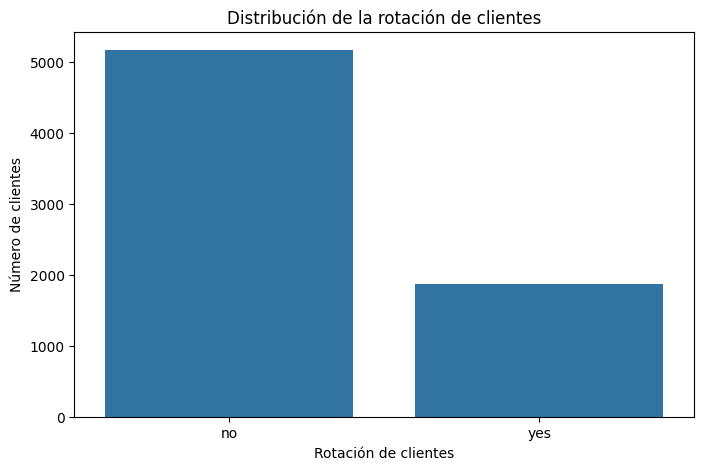

In [19]:

# Gráfico de barras de la columna `rotación de clientes`
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df)
plt.title('Distribución de la rotación de clientes')
plt.xlabel('Rotación de clientes')
plt.ylabel('Número de clientes')
plt.show()
# Interpretación: Hay un número significativamente mayor de clientes que no se van que de clientes que sí se van.
# Significa que a los clientes les gusta lo que se ofrece


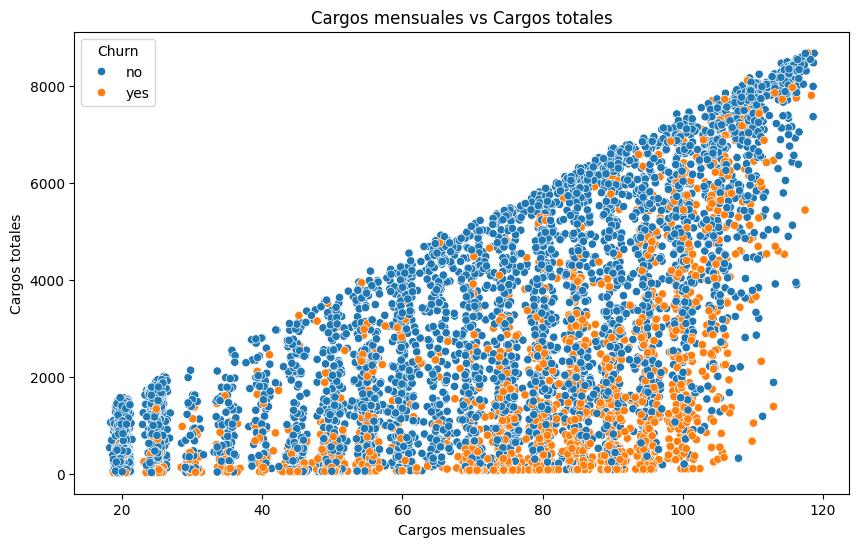

In [20]:
#2.2 Crear dos tipos diferentes de visualizaciones exploratorias multivariadas.

# Diagrama de dispersión de `MonthlyCharges` vs `TotalCharges`
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title('Cargos mensuales vs Cargos totales')
plt.xlabel('Cargos mensuales')
plt.ylabel('Cargos totales')
plt.show()
# Interpretación: Los clientes que se van tienden a tener cargos mensuales más altos y cargos totales más bajos.
# No existe una relación directa y evidente entre los cargos mensuales o totales y la probabilidad de rotación de clientes.



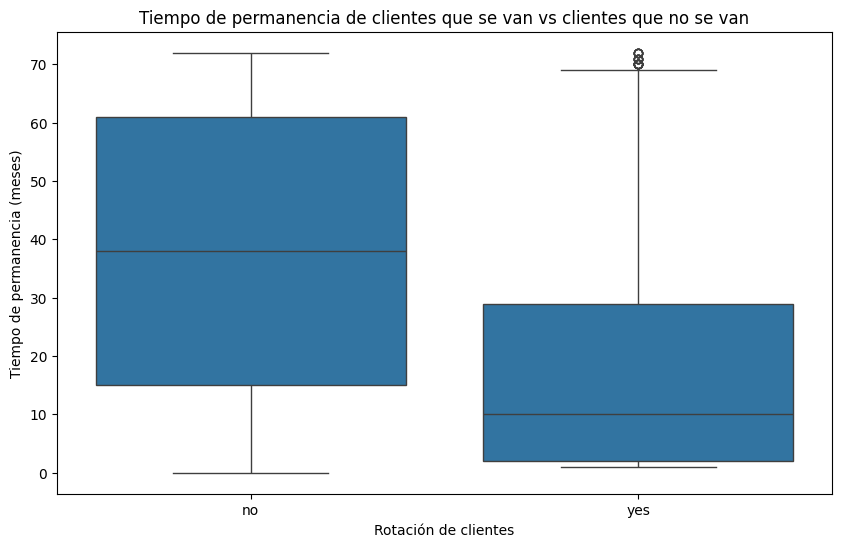

In [21]:
# Diagrama de caja de `tiempo de permanencia` para cada valor de `rotación de clientes`
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tiempo de permanencia de clientes que se van vs clientes que no se van')
plt.xlabel('Rotación de clientes')
plt.ylabel('Tiempo de permanencia (meses)')
plt.show()
# Interpretación: Los clientes que se van tienden a tener un tiempo de permanencia más corto que los clientes que no se van.

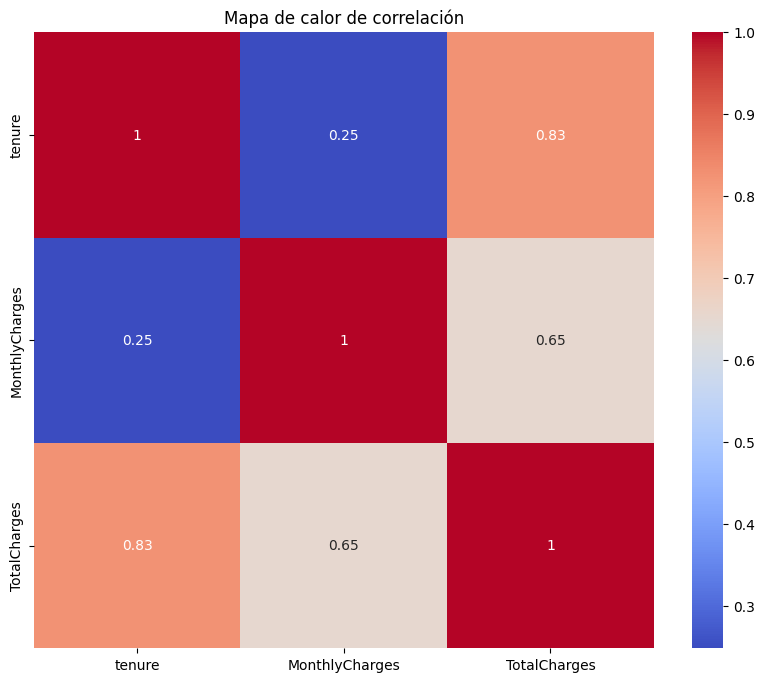

In [22]:
# mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()


# Interpretación: Cuanto más antiguo sea un cliente, mayor será su gasto acumulado